# Simple Linear Regression is a method to help us understand the relationship between two variables:

- The predictor/independent variable (X).
- The response/dependent variable (that we want to predict)(Y).
The result of Linear Regression is a linear function that predicts the response (dependent) variable as a function of the predictor (independent) variable.

* 𝑌:𝑅𝑒𝑠𝑝𝑜𝑛𝑠𝑒𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒
* 𝑋:𝑃𝑟𝑒𝑑𝑖𝑐𝑡𝑜𝑟𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒𝑠
### Linear function: 𝑌=𝑎+𝑏𝑋 
- a: refers to the intercept of the regression line0, in other words: the value of Y when X is 0
- b: refers to the slope of the regression line, in other words: the value with which Y changes when X increases by 1 unit

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\kaout\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv')
pd.set_option('display.max_columns', 29)
df
# our data has 201 rows and 29 columns

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,0.956944,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,0.955556,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,0.956944,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,0.956944,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0


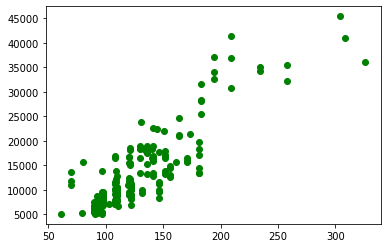

In [38]:
plt.scatter(df['engine-size'] ,df['price'],color='green')

# Train/test split:
80% train data, 20% test data

In [42]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]


In [3]:
from sklearn.linear_model import LinearRegression

In [53]:
lm = LinearRegression()
train_x = np.asanyarray(train[['engine-size']])
train_y = np.asanyarray(train[['price']])
lm.fit (train_x, train_y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
Y_pred=lm.predict(X)
print('y predicted :',Y_pred[0:5])
print('y actual :',Y[0:5])

y predicted : [[13473.63303294]
 [13473.63303294]
 [17010.89662729]
 [10097.15414744]
 [14438.34128595]]
y actual : 0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64


In [55]:
print('the intercept is:',lm.intercept_ ,'\nthe slope is :',lm.coef_)


the intercept is: [-7428.37911544] 
the slope is : [[160.78470883]]


### The final estimated linear model we get?
Plugging in the actual values we get: 
* price = -7428.37 + 160.78 x engine-size

Text(0.5, 0, 'engine-size')

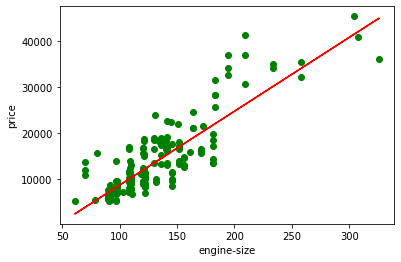

In [56]:
plt.scatter(X, Y,  color='green')
plt.plot(X,lm.intercept_ + lm.coef_*X , '-r')
plt.ylabel("price")
plt.xlabel("engine-size")

# Model Evaluation Using Visualization

### Regression Plot:
This plot will show a combination of a scattered data points (a scatter plot), as well as the fitted linear regression line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation)

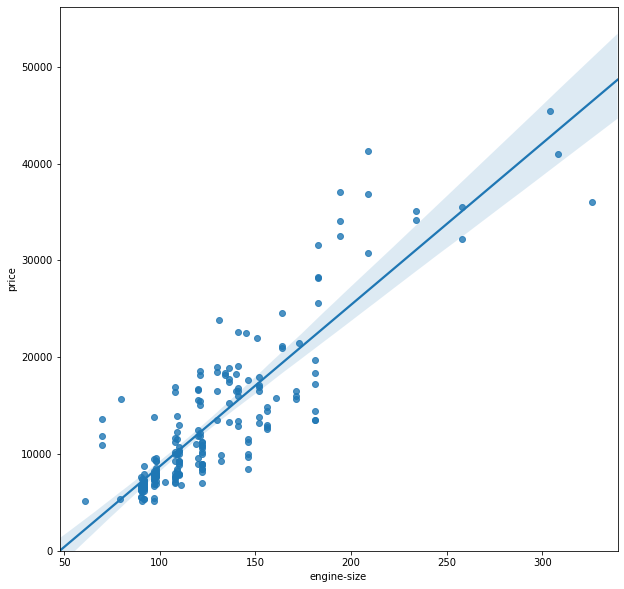

In [10]:
plt.figure(figsize=(10, 10))
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)
plt.show()

We can see from this plot that price is positively correlated to engine-size, since the regression slope is positive. One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line.It gives a good indication of the variance of the data, and whether a linear model would be the best fit or not. If the data is too far off from the line, this linear model might be a good model for this data.

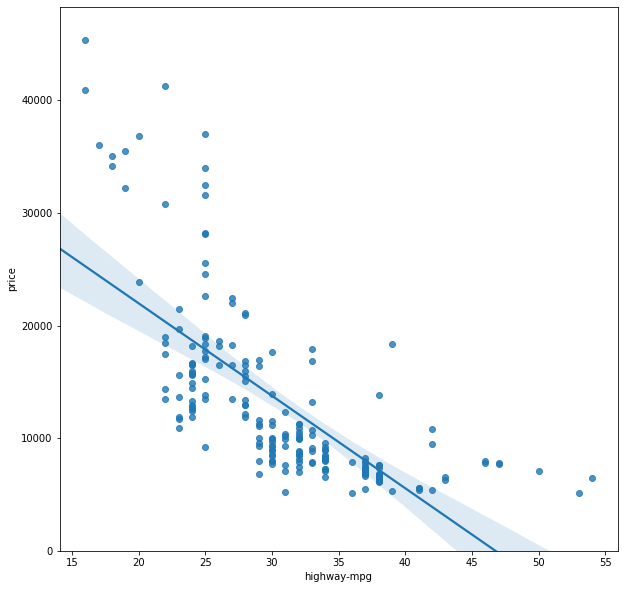

In [14]:
plt.figure(figsize=(10, 10))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)
plt.show()

We can see from this plot that price is negatively correlated to highway-mpg, since the regression slope is negative.
Comparing the regression plot of "engine-size" and "highway-mpg" we see that the points for "engine-size" are much closer to the generated line and on the average increase.

In [15]:
df[["engine-size","highway-mpg","price"]].corr()

,engine-size,highway-mpg,price
engine-size,1.000000,-0.679571,0.872335
highway-mpg,-0.679571,1.000000,-0.704692
price,0.872335,-0.704692,1.000000


### Residual plot:
A good way to visualize the variance of the data is to use a residual plot.

* a residual: is the difference between the observed value (y) and the predicted value (y_pred) .( When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.)

* a residual plot :is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.

We look at the spread of the residuals when looking at a residual plot:

- If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data. because randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.

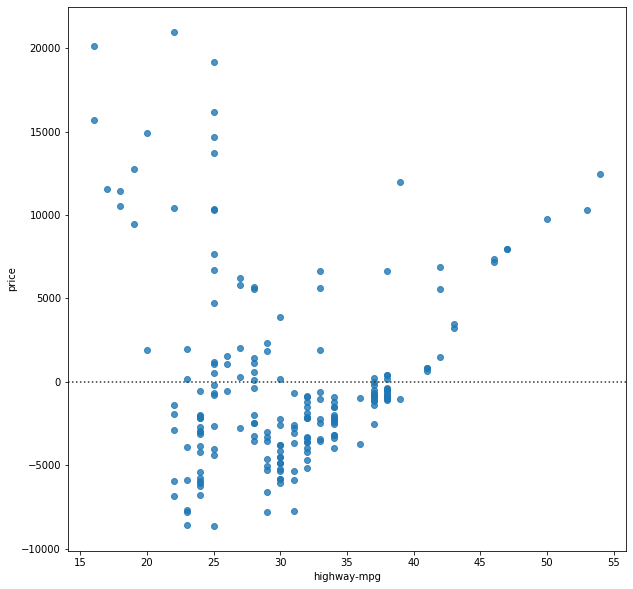

In [19]:
plt.figure(figsize=(10, 10))
sns.residplot(df["highway-mpg"], df["price"])
plt.show()

We can see from this residual plot that the residuals are not randomly spread around the x-axis, which leads us to believe that maybe a non-linear model is more appropriate for this data.

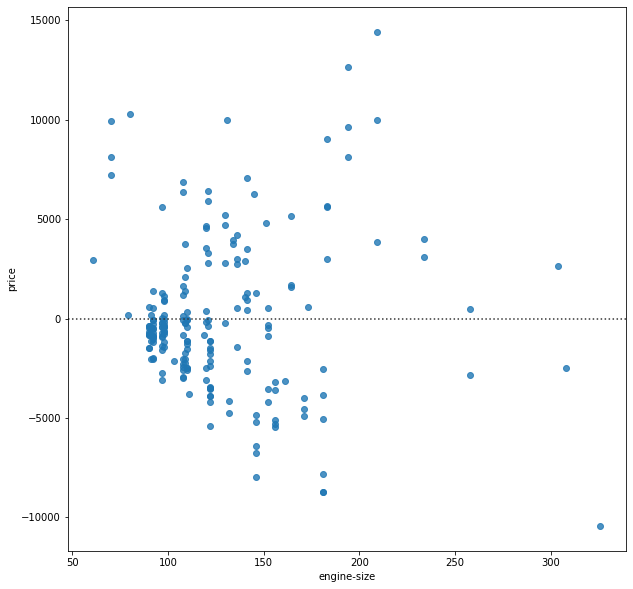

In [20]:
plt.figure(figsize=(10, 10))
sns.residplot(df["engine-size"], df["price"])
plt.show()

# Measures for In-Sample Evaluation :quantitative measure to determine how accurate the model is.
* Mean Absolute Error: the absolute difference between actual value (y) and the estimated value (ŷ)
* Mean Squared Error(MSE): the average of the squares of errors
* R^2 / R-squared : a measure to indicate how close the data are to the fitted regression line
* RMSE root mean squared error: the square root of MSE

In [58]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['engine-size']])
test_y = np.asanyarray(test[['price']])
test_y_pred = lm.predict(test_x)
print('The R-square is: ', r2_score(test_y,test_y_pred))
#We can say that ~ 66% of the variation of the price is explained by this simple linear model "engine-size"

The R-square is:  0.6607468246574292


In [61]:
from sklearn.metrics import mean_squared_error
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_pred - test_y)))
print('The mean square error of price and predicted value is: ', mean_squared_error(test_y_pred,test_y))
print('The square root mean square error of price and predicted value is: ',np.sqrt(mean_squared_error(test_y_pred,test_y)))

Mean absolute error: 3327.12
The mean square error of price and predicted value is:  22192731.50399194
The square root mean square error of price and predicted value is:  4710.916206428633
